# Heat Capacity

The **heat capacity** of a material/object describes the temperature change of the object if heat is added to (or removed from) the object.  

In geothermics, the heat capacity is of particular interest, as we extract heat from a system (the geothermal reservoir) and thus cool it. The heat capacity directly tells us, how much energy we theoretically can extract, if the reservoir body is cooled by $X$ Kelvin. For example, imagine a cubic kilometer granite with a temperature of 200 °C. If this 1 km³ is cooled down by 20 K (200 °C -> 180 °C) the available energy equals 1 billion litres oil.  

This corresponds to cooling down 1 km³ granite by 20 °C providing about 10 MW electrical power for a period of about 20 years.


Heat capacity changes over temperature ranges. But if the temperature change is sufficiently small, it can be defined as:  
$$ C = \frac{\Delta Q}{\Delta T} \qquad \textrm{in J K$^{-1}$} $$  

It is an extensive quantity, meaning it is size-dependent (being the size of our observed system). This is quite obvious, if you imagine 1 cm³ granite cooled down by 20 °C would provide way less energy.

Thus we usually look at heat capacity as an intensive property, which is independent of the extent of our system. For doing this, we have to relate heat capacity to a quantity, such as mass or volume. The **specific heat capacity** $c_p$ (related to mass) is maybe the most often used formulation. It has the unit J kg$^{-1}$ K$^{-1}$. The specific heat capacity (also isobaric heat capacity), can easily be measured in a lab (which we will se in part 3 of the lecture). 

In this notebook, we look at measurements of the specific heat capacity over a temperature range and fit an expression (a polynom), which describes the change in specific heat capacity with temperature for a particular rock sample.

The specific heat capacity was measured in a temperature sweep from 40 °C to 250 °C. Measured specific heat capacities and temperatures are used for a nonlinear regression in order to fit a polynom of form (Hirono and Hamada, 2010):  

$$c_p(T) = a + bT + cT^2 + dT^{-1} + eT^{-2}$$ 

with $c_p$ in J kg$^{-1}$ K$^{-1}$ and $T$ in K.  

We can also use a simpler equation to fit the $c_p$ data:  

$$c_p(T) = a + bT + cT^2$$  

with $c_p$ in J kg$^{-1}$ K$^{-1}$ and $T$ in °C. 

Here we will first try to fit the data using a linear and quadratic polynom, respectively, and subsequently use the formulation of Hirono and Hamada

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as p
from scipy import optimize
%matplotlib inline

In [2]:
# define the function for fitting the data to the different approaches above. First use the quadratic approximation
def fun(x,a,b,c):
    return a + b*x + c*x**2 
#+ d/x + e/x**2

The function `fun` returns the specific heat capacity with known parameters a to to c, or e, respectively. x in the function is a temperature range, i.e. a vector. However, for calculating the specific heat capacity over a certain temperature range, we need to assess the coefficients a to c, or e, respectively.  
We do this by fitting the polynom to measured data. First off, let's import the data and give it a look:

In [3]:
data = p.read_csv('data/03_cp.dat')
data.head()

,Temp[C],cp[J/kgK]
0,40.0,881.113
1,45.0,889.392
2,50.0,896.739
3,55.0,904.091
4,60.0,911.635


The specific heat capacity of this sample increases with temperature almost linearly, so a linear fit might give satisfactory results. Let's have a look:

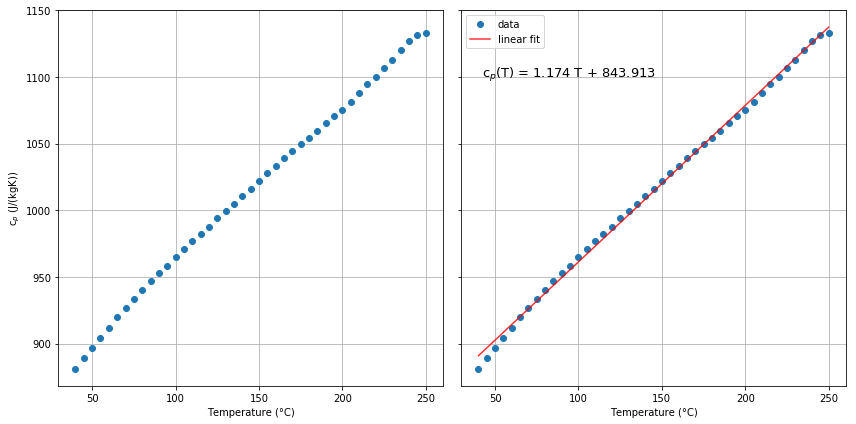

In [4]:
fig, axs = plt.subplots(1,2,figsize=[12,6], sharey=True)
axs[0].plot(data['Temp[C]'], data['cp[J/kgK]'], 'o')
axs[0].set_xlabel('Temperature (°C)')
axs[0].set_ylabel('c$_p$ (J/(kgK))')
axs[0].grid(True)
# fit a linear equation to the data and calculate a simulated specific heat capacity cp_s
m, b = np.polyfit(data['Temp[C]'], data['cp[J/kgK]'], 1) 
temp_s = np.linspace(40,250,100)
cp_s = temp_s*m + b

axs[1].plot(data['Temp[C]'], data['cp[J/kgK]'], 'o', label='data')
axs[1].plot(temp_s, cp_s, 'r-',alpha=0.8, label='linear fit')
# die Option alpha bestimmt die Transparenz des Fits
axs[1].set_xlabel('Temperature (°C)')
axs[1].legend()
axs[1].text(42, 1100, 
        'c$_p$(T) = {0:.3f} T + {1:.3f} '
        .format(*tuple((m,b))),fontsize=13)
plt.tight_layout()
axs[1].grid(True)
# plt.savefig('cp.pdf')

While the fit is not too bad, it does not capture the change in specific heat capacities at lower temperatures, and likely also at higher temperatures over 250 °C. So let's look at a more complex fit using the function above (first the quadratic approximation):

In [5]:
Tdat = data['Temp[C]']+273.15 # for the function, we need temperatures in Kelvin
cpdat = data['cp[J/kgK]']

# after defining the data, we perform a nonlinear regression using optimize.curve_fit
popt, pcov = optimize.curve_fit(fun,Tdat,cpdat)

temp_sK = temp_s+273.15 # regression temperature must be in K for the function
cpsim = fun(temp_sK,popt[0],popt[1],popt[2]) # fitted cp

Text(540,1125,'c$_p$(T) = 416.145 + 1.698 T + -0.00063 T$^2$')

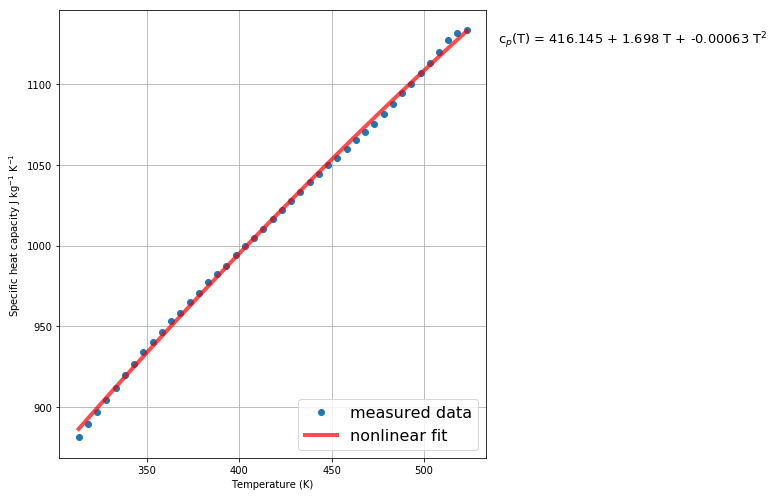

In [6]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(7,7))
ax.plot(Tdat,cpdat,'o', label="measured data") # plot just every nth point
ax.plot(temp_sK,cpsim,'r-',linewidth=4, alpha=0.7, label="nonlinear fit")
ax.legend(fontsize=16,loc=4)
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Specific heat capacity J kg$^{-1}$ K$^{-1}$")
#m.rcParams.update({'font.size':15})
plt.tight_layout()
plt.grid(True)
ax.text(540, 1125, 
        'c$_p$(T) = {0:.3f} + {1:.3f} T + {2:.5f} T$^2$'
        .format(*tuple(popt)),fontsize=13)

In contrast to the linear fit, this quadratic fit only yields a very minor improvement. Therefore, try to change the definition of the function above, so it will represent the function of Hirono and Hamada. Plot it and check if the fit will improve.